In [115]:
import pandas as pd
import numpy as np
import os
from numpy import random
import scipy 
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm ,t
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
from random import choice
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion  as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [116]:
df = pd.read_excel('CDAC_Databook.xlsx', sheet_name='birth')

In [117]:
df.head()

,BirthRate
0,26.663
1,23.598
2,26.931
3,24.740
4,25.806


In [118]:
df.shape

(168, 1)

In [119]:
168/12

14.0

<Axes: >

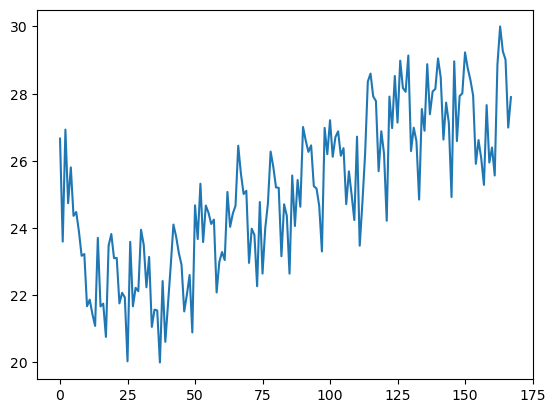

In [120]:
df['BirthRate'].plot()

In [121]:
r1 = statsmodels.tsa.seasonal.seasonal_decompose(df['BirthRate'], period = 12)

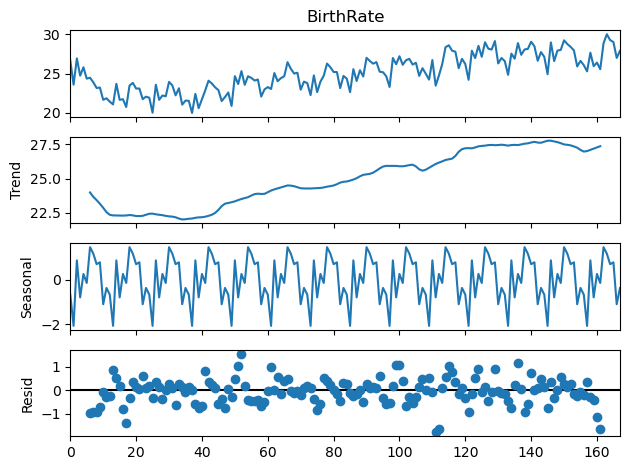

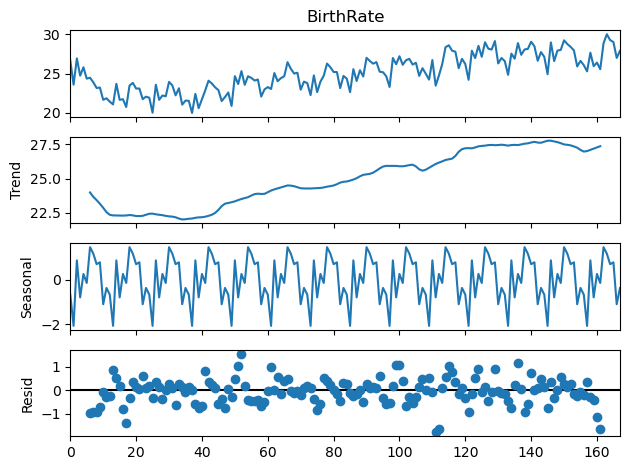

In [122]:
r1.plot()

In [123]:
df_train = df.iloc[:144]
df_test = df.iloc[144:]

In [124]:
df_train.shape

(144, 1)

In [125]:
df_test.shape

(24, 1)

### Naive Method

In [127]:
df_train['BirthRate'][140:]

140    29.048
141    28.484
142    26.634
143    27.735
Name: BirthRate, dtype: float64

In [128]:
df_test["Naive"] = 27.735

C:\Users\Abhay\AppData\Local\Temp\ipykernel_22988\208879483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Naive"] = 27.735


In [129]:
df_test.head()

,BirthRate,Naive
144,27.132,27.735
145,24.924,27.735
146,28.963,27.735
147,26.589,27.735
148,27.931,27.735


In [130]:
rmse1 = (mean_squared_error(df_test['BirthRate'], df_test['Naive']))**0.5

In [131]:
rmse1

1.4277309211939526

In [132]:
# simple Average Method
df_train['BirthRate'].mean()

24.656833333333335

In [133]:
df_test['Mean'] = 24.6568

C:\Users\Abhay\AppData\Local\Temp\ipykernel_22988\4079998337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Mean'] = 24.6568


In [134]:
df_test.head()

,BirthRate,Naive,Mean
144,27.132,27.735,24.6568
145,24.924,27.735,24.6568
146,28.963,27.735,24.6568
147,26.589,27.735,24.6568
148,27.931,27.735,24.6568


In [135]:
rmse2 = (mean_squared_error(df_test['BirthRate'], df_test['Mean']))**0.5

In [136]:
rmse2 # worse than rmse1

3.147687482899152

In [137]:
np.mean(df_train['BirthRate'][140:])

27.97525

In [138]:
# Moving Average

df_test['MA-12'] = df_train['BirthRate'].rolling(12).mean().iloc[-1]
df_test['MA-24'] = df_train['BirthRate'].rolling(24).mean().iloc[-1]

C:\Users\Abhay\AppData\Local\Temp\ipykernel_22988\1101691915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MA-12'] = df_train['BirthRate'].rolling(12).mean().iloc[-1]
C:\Users\Abhay\AppData\Local\Temp\ipykernel_22988\1101691915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MA-24'] = df_train['BirthRate'].rolling(24).mean().iloc[-1]


In [139]:
rmse3 = (mean_squared_error(df_test['BirthRate'], df_test['MA-12']))**0.5
rmse4 = (mean_squared_error(df_test['BirthRate'], df_test['MA-24']))**0.5

In [140]:
rmse3

1.4044810849760687

In [141]:
rmse4

1.4038687245726835

## Weighted moving average

In [143]:
sales = [6,5,8,7,4,7,6,8,9,6,4,7]
# calc 3 - weighted moving average
# weights = 5,3,2

last_3 = sales[-3:]
last_3

[6, 4, 7]

In [144]:
avg_3 = np.mean(last_3)

In [145]:
avg_3

5.666666666666667

In [146]:
last_3 = np.array(last_3)
weights = np.array([2,3,5])

In [147]:
ans_part = last_3 * weights

In [148]:
ans_part

array([12, 12, 35])

In [149]:
sum(ans_part)/sum(weights)

5.9

In [150]:
df_train.head()

,BirthRate
0,26.663
1,23.598
2,26.931
3,24.740
4,25.806


In [151]:
df_test.head()

,BirthRate,Naive,Mean,MA-12,MA-24
144,27.132,27.735,24.6568,27.520917,27.452583
145,24.924,27.735,24.6568,27.520917,27.452583
146,28.963,27.735,24.6568,27.520917,27.452583
147,26.589,27.735,24.6568,27.520917,27.452583
148,27.931,27.735,24.6568,27.520917,27.452583


In [152]:
avg_3_ = []

for i in range(len(sales)):
    if i + 3 > len(sales):
        break
    avg_3_.append(sum(np.array(sales[i:i+3]) * weights)/10)

In [153]:
avg_3_

[6.7, 6.9, 5.7, 6.1, 5.9, 7.2, 8.1, 7.3, 5.6, 5.9]

In [154]:
(6*2+5*3+8*5)/10

6.7

In [155]:
(6*2 + 4*3 + 7*5)/10

5.9

In [156]:
vals = np.array(df_train[132:])

In [157]:
vals

array([[26.589],
       [24.848],
       [27.543],
       [26.896],
       [28.878],
       [27.39 ],
       [28.065],
       [28.141],
       [29.048],
       [28.484],
       [26.634],
       [27.735]])

In [158]:
wts = np.array([1,3,5,7,9,11,13,15,17,19,21,25])

In [159]:
pred = sum(vals * wts)/sum(wts)

In [160]:
pred

array([ 2.26199315,  6.78597945, 11.30996575, 15.83395205, 20.35793836,
       24.88192466, 29.40591096, 33.92989726, 38.45388356, 42.97786986,
       47.50185616, 56.54982877])

In [161]:
# df_test['Weighted Moving Average'] = pred

## Simple Exponential Smoothening

In [163]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [164]:
mod1 = SimpleExpSmoothing(np.asarray(df_train['BirthRate'])).fit()

In [165]:
print(mod1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  144
Model:             SimpleExpSmoothing   SSE                            231.665
Optimized:                       True   AIC                             72.469
Trend:                           None   BIC                             78.408
Seasonal:                        None   AICC                            72.757
Seasonal Periods:                None   Date:                 Fri, 03 Jan 2025
Box-Cox:                        False   Time:                         09:31:53
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4494120                alpha                 True
initial_level              26.663000                

In [166]:
df_test['SES'] = mod1.forecast(len(df_test))

C:\Users\Abhay\AppData\Local\Temp\ipykernel_22988\4066666204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['SES'] = mod1.forecast(len(df_test))


In [167]:
df_test.head()

,BirthRate,Naive,Mean,MA-12,MA-24,SES
144,27.132,27.735,24.6568,27.520917,27.452583,27.682954
145,24.924,27.735,24.6568,27.520917,27.452583,27.682954
146,28.963,27.735,24.6568,27.520917,27.452583,27.682954
147,26.589,27.735,24.6568,27.520917,27.452583,27.682954
148,27.931,27.735,24.6568,27.520917,27.452583,27.682954


In [168]:
rmse6 = (mean_squared_error(df_test['BirthRate'], df_test['SES']))**0.5

In [169]:
rmse6

1.419145449268861

## Holt's Linear

- Holt's Linear trend method is used when we have **ONLY** trend and **NO** seasonal variation

In [171]:
from statsmodels.tsa.api import Holt

In [172]:
mod2 = Holt(np.asarray(df_train['BirthRate'])).fit(smoothing_level=0.8)
df_test['Holt'] = mod2.forecast(len(df_test))
rmes7 = (mean_squared_error(df_test['BirthRate'],df_test['Holt']))**0.5
rmes7

C:\Users\Abhay\AppData\Local\Temp\ipykernel_22988\236981043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Holt'] = mod2.forecast(len(df_test))


1.5008981781287392

## Holt-Winters

- Holt-Winters method is used when we have **BOTH** linear and Seasonal Variation

In [174]:
from statsmodels.tsa.api import ExponentialSmoothing

In [175]:
mod3 = ExponentialSmoothing(np.asarray(df_train['BirthRate']), seasonal_periods=12).fit(smoothing_level=0.8)
df_test['ExponentialSmoothing'] = mod3.forecast(len(df_test))
rmse8 = (mean_squared_error(df_test['BirthRate'], df_test['ExponentialSmoothing'])) ** 0.5
rmse8

C:\Users\Abhay\AppData\Local\Temp\ipykernel_22988\1768788958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ExponentialSmoothing'] = mod3.forecast(len(df_test))


1.4086237555629835

### Checking if the TS is stationary or not

In [177]:
from statsmodels.tsa.stattools import adfuller

In [178]:
adfuller(df_train)

(0.2017160479163213,
 0.9723576777571014,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 322.55907506392055)

In [179]:
# 0.9723576777571014, is the p-value :: 0.97 > 0.05, Null Hypo NOT rejected

In [180]:
d1 = df_train.diff().dropna() # used to take difference and check if they are stationary or not

In [181]:
adfuller(d1)

(-4.253904918858682,
 0.0005333378978881327,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 314.64706729275866)

In [182]:
# 0.00053 < 0.05 , Null Hypo IS REJECTED ;; It is stationary

In [183]:
d1.head()

,BirthRate
1,-3.065
2,3.333
3,-2.191
4,1.066
5,-1.442


<Axes: >

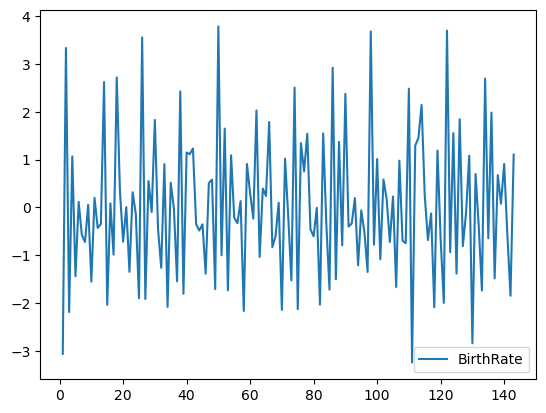

In [184]:
d1.plot()

## ACF and PACF

In [186]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

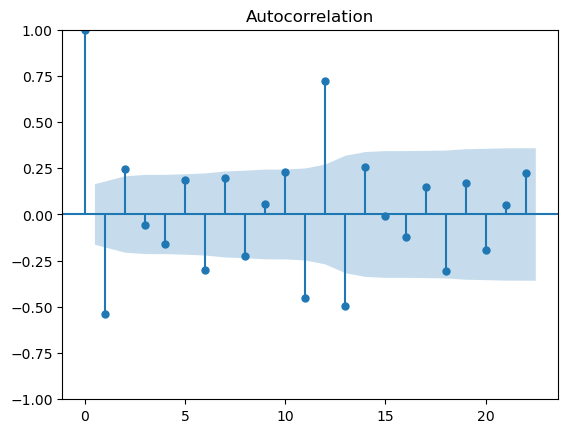

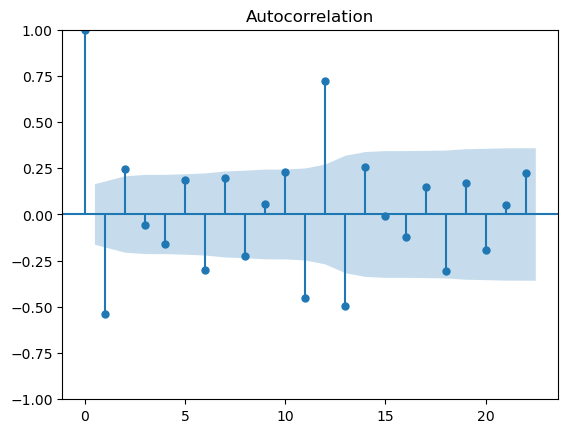

In [187]:
plot_acf(d1) # shows correlation as the lag number increases

- After 2 lags , all the correlation coefficient is insignificant
- therefore, q = 2
- ACF gives all the influences

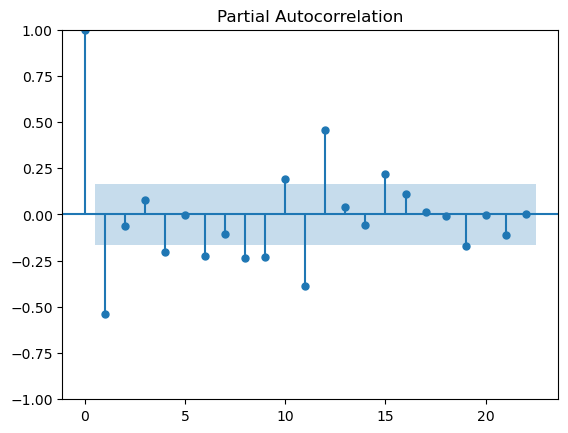

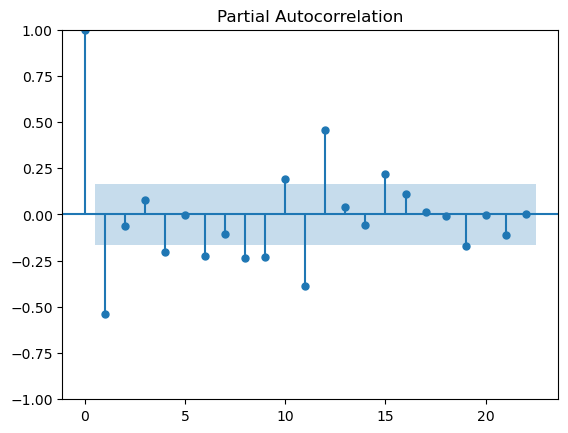

In [189]:
plot_pacf(d1)

- Shows partital influences. Only Direct Influence
- Here 1 will become p value

## ARIMA(Autoregressive Integrated Moving Average)

In [194]:
from statsmodels.tsa.arima.model import ARIMA

In [196]:
mod4 = ARIMA(df_train, order = (1,1,2)).fit()

In [198]:
df_test['ARIMA'] = mod4.forecast(len(df_test))

C:\Users\Abhay\AppData\Local\Temp\ipykernel_22988\52810534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ARIMA'] = mod4.forecast(len(df_test))


In [200]:
rmse9 = (mean_squared_error(df_test['BirthRate'], df_test['ARIMA']))**0.5
rmse9

1.42464853809437